In [117]:
import h5py
from matplotlib import pyplot as plt
import numpy as np

In [110]:
calibrated_data_filename = 'Somewhere_300_04_09_2023_1684420276_preprocessed.hdf5'
calibrated_data_hdf5 = h5py.File(calibrated_data_filename, 'r')
print(calibrated_data_hdf5.keys())
calibrated_hyperspectral_image = calibrated_data_hdf5['calibrated_hyperspectral_image'][:]
wavelengths = calibrated_data_hdf5['final_wavelengths'][:]


<KeysViewHDF5 ['calibrated_hyperspectral_image', 'final_wavelengths']>


Text(0.5, 1.0, 'Calibrated Spectrum')

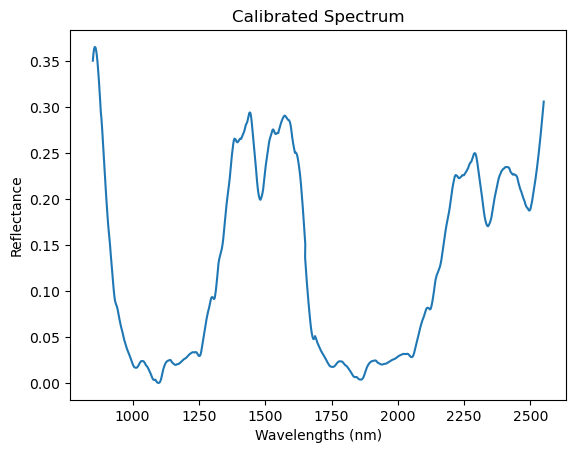

In [121]:

current_spectrum = calibrated_hyperspectral_image[100,:]
current_spectrum = current_spectrum + np.abs(current_spectrum.min())
plt.plot(wavelengths, current_spectrum)
plt.xlabel('Wavelengths (nm)')
plt.ylabel('Reflectance')
plt.title('Calibrated Spectrum')

In [33]:
# Run on Python 2.7 and 3.x

from __future__ import print_function

%matplotlib inline

import os
import pysptools.spectro as spectro


class SpecLib(object):

    def __init__(self, lib_name):
        rd = spectro.EnviReader(lib_name)
        self.lib = spectro.USGS06SpecLib(rd)

    def get(self, substance, sample):
        for spectrum, sample_id, descrip, idx in self.lib.get_substance(substance, sample):
            return spectrum

    def get_wvl(self):
        return self.lib.get_wvl()


def display_convex_hull(lib, substance, sample):
    spectrum = lib.get(substance, sample)
    wvl = lib.get_wvl()

    schq = spectro.SpectrumConvexHullQuotient(spectrum, wvl)
    display_name = '{0}_{1}'.format(substance, sample)
    schq.display(display_name)


def extract_and_display_features(lib, baseline, substance, sample):
    """
    Process the s06av95a_envi file and extract the <substance> and/or <sample>
    features according to the <baseline> value.
    """
    spectrum = lib.get(substance, sample)
    wvl = lib.get_wvl()
    fea = spectro.FeaturesConvexHullQuotient(spectrum, wvl, baseline=baseline)
    display_name = '{0}_{1}'.format(substance, sample)
    fea.display(display_name, feature='all')


# substances = [('Biotite', 'WS660'),
#             ('Chalcedony', 'CU91-6A'),
#             ('Kaolinite', 'CM7'),
#             ('Gibbsite', 'HS423.3B')]

# data_path = os.environ['PYSPTOOLS_USGS']

# spec_lib = 's06av95a_envi.hdr'
# lib_path = os.path.join(data_path, spec_lib)

# lib = SpecLib(lib_path)
# base = 0.93
# for substance,sample in substances:
#     print('Convex hull and features for {0} {1}'.format(substance,sample))
#     display_convex_hull(lib, substance, sample)
#     extract_and_display_features(lib, base, substance, sample)

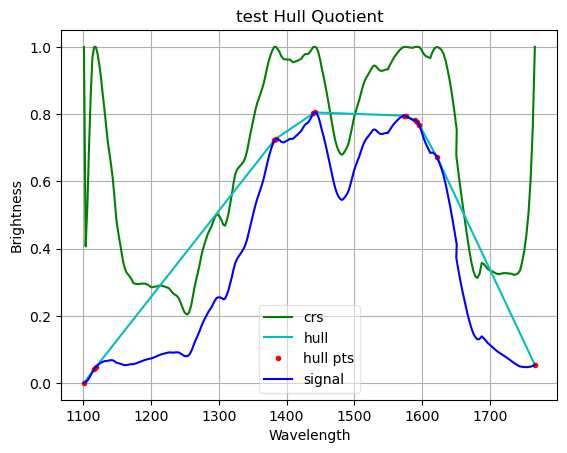

In [128]:
start = 100
finish = -250



input_data = (current_spectrum/current_spectrum.max()).tolist()[start:finish]

input_wave = wavelengths.tolist()[start:finish]

chr = spectro.SpectrumConvexHullQuotient(input_data,
                                         input_wave,
                                         normalize=False)
chr.display('test')

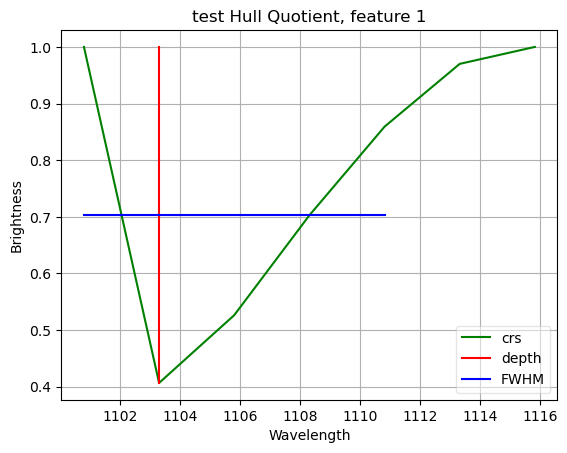

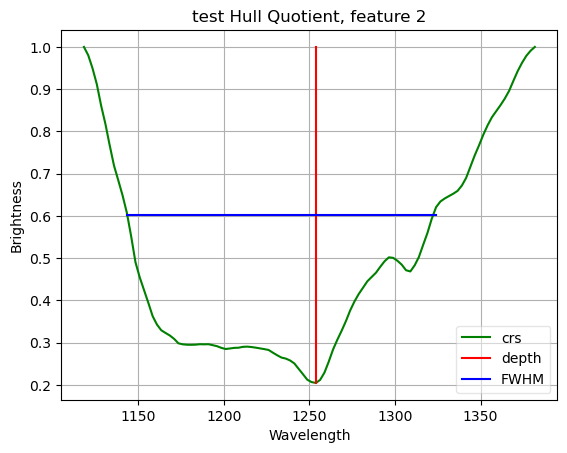

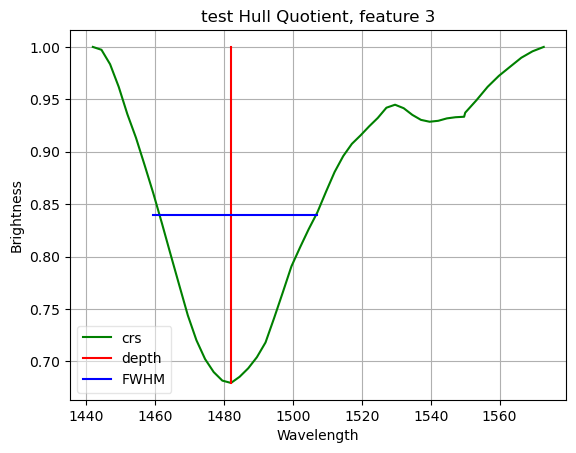

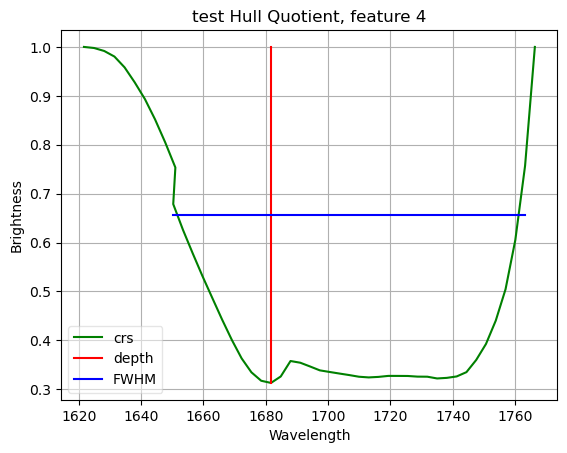

<Figure size 640x480 with 0 Axes>

In [134]:
fea = spectro.FeaturesConvexHullQuotient(input_data,
                                         input_wave,
                                         baseline = .9)

fea.display('test')
plt.show()
